In [1]:
import os
thispath = '/home/dreuter/Github/python-paths/Python_A-Z'
os.chdir(thispath)
print(os.getcwd())

/home/dreuter/Github/python-paths/Python_A-Z


#### Import csv-data and handle categorical varibles

In [2]:
import pandas as pd
movies = pd.read_csv("P4-Movie-Ratings.csv")
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film                         559 non-null object
Genre                        559 non-null object
Rotten Tomatoes Ratings %    559 non-null int64
Audience Ratings %           559 non-null int64
Budget (million $)           559 non-null int64
Year of release              559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


### change data interpretation to category

In [3]:
movies.columns = ['Film',
                  'Genre',
                  'CriticRating',
                  'AudienceRating',
                  'BudgetMillions',
                  'Year']
movies.Film = movies.Film.astype('category')
movies.Genre = movies.Genre.astype('category')
movies.Year = movies.Year.astype('category')

In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null category
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [5]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [6]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


In [7]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

### Jointplots

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

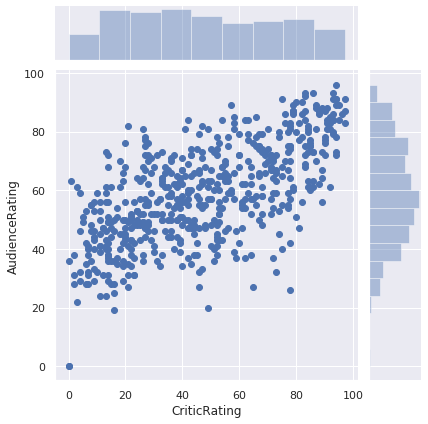

In [9]:
j1test = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating', kind='scatter')

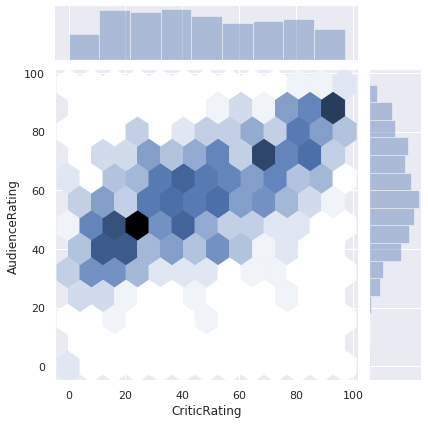

In [10]:
j1 = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating', kind='hex')

### Histograms

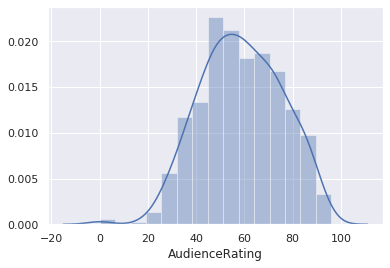

In [11]:
m1 = sns.distplot(movies.AudienceRating, bins=15)

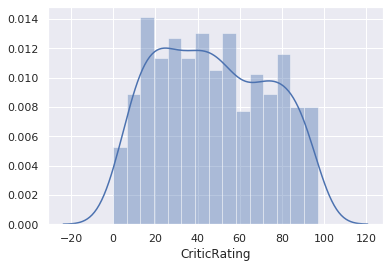

In [12]:
m2 = sns.distplot(movies.CriticRating, bins=15)

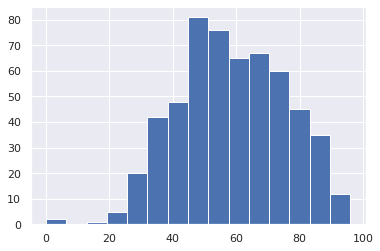

In [13]:
n1 = plt.hist(movies.AudienceRating, bins=15)

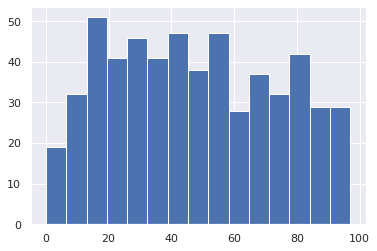

In [14]:
n1 = plt.hist(movies.CriticRating, bins=15)

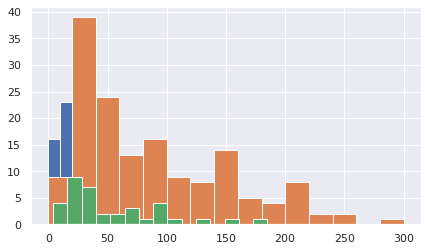

In [43]:
#Stacked Histograms, the unclever way
plt.hist(movies[movies.Genre == 'Drama'].BudgetMillions, bins=15)
plt.hist(movies[movies.Genre == 'Action'].BudgetMillions, bins=15)
plt.hist(movies[movies.Genre == 'Thriller'].BudgetMillions, bins=15)
plt.show()

### Stacked Histograms, the more clever way, as a list of Pandas Series objects

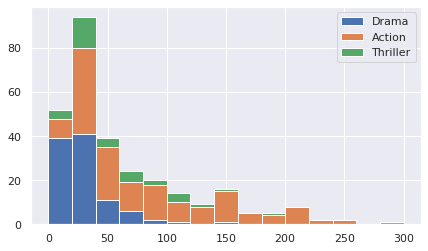

In [48]:
stackedlist = [movies[movies.Genre == 'Drama'].BudgetMillions, \
               movies[movies.Genre == 'Action'].BudgetMillions, \
               movies[movies.Genre == 'Thriller'].BudgetMillions]
plt.hist(stackedlist, bins=15, stacked=True, label=['Drama','Action','Thriller'])
plt.legend()
plt.show()

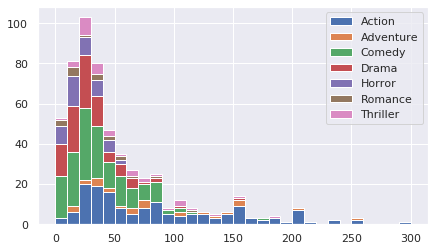

In [49]:
genres = list(movies.Genre.cat.categories)
stackedlist = []
for genre in genres:
       stackedlist.append(movies[movies.Genre == genre].BudgetMillions)
plt.hist(stackedlist, bins=30, stacked=True, label=genres)
plt.legend()
plt.show()

### KDE Plot - Kernel Density Estimation Plots

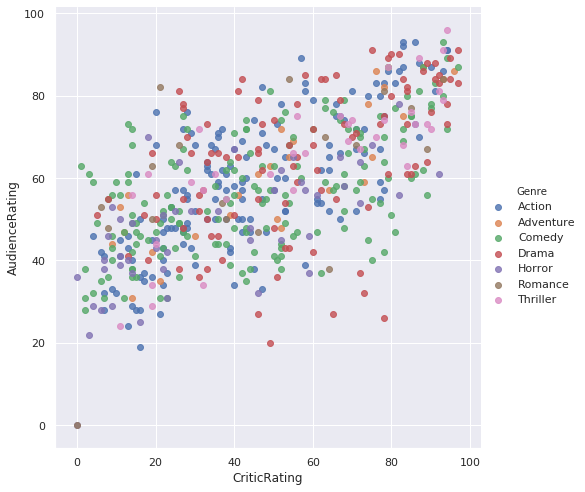

In [54]:
# Scatter first to get a visual first glance
vis1 = sns.lmplot(data=movies,
                     x='CriticRating',
                     y='AudienceRating',
                     fit_reg=False,
                     hue='Genre',
                     height=7,
                     aspect=1)

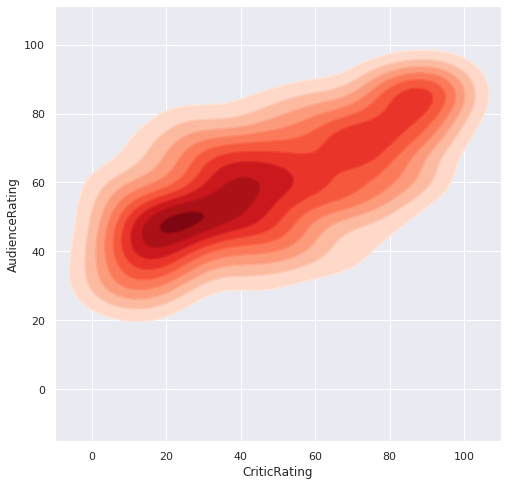

In [69]:
# The very same data as a KDE Plot, with some styling overlap trick
plt.figure(figsize=(8,8))
k1 = sns.kdeplot(movies.CriticRating,
                 movies.AudienceRating,
                 shade=True,
                 shade_lowest=False,
                 cmap='Reds')
k1b = sns.kdeplot(movies.CriticRating,
                  movies.AudienceRating,
                  cmap='Reds')
plt.xlim(-10,110)
plt.show()

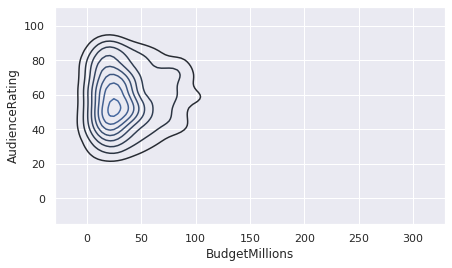

In [70]:
k1 = sns.kdeplot(movies.BudgetMillions,
                 movies.AudienceRating)

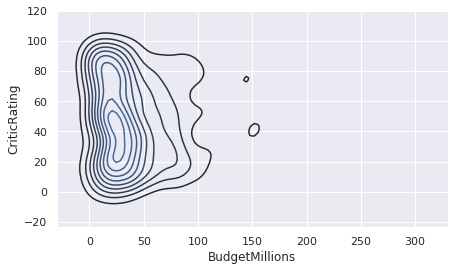

In [71]:
k2 = sns.kdeplot(movies.BudgetMillions,
                 movies.CriticRating)

## Subplots

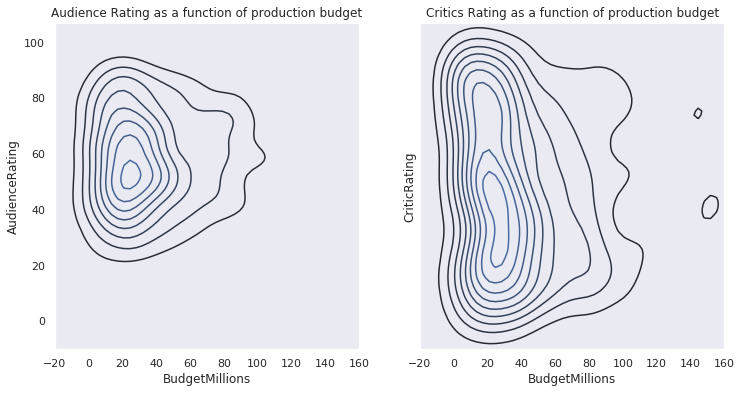

In [22]:
sns.set_style('dark')
f, axes = plt.subplots(1,2, figsize=(12,6), sharex=True, sharey=True)
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[1])
k1.set(xlim=(-20,120), ylim=(20,97), title='Audience Rating as a function of production budget')
k2.set(xlim=(-20,160), ylim=(-10,107), title='Critics Rating as a function of production budget')
plt.show()

In [23]:
#ViolinPlots
sns.set(rc={'figure.figsize':(7,4)})

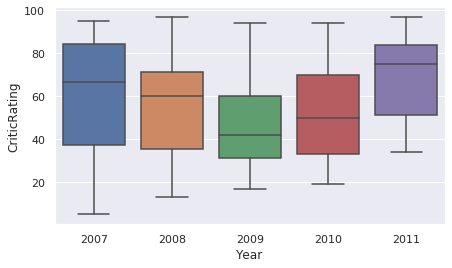

In [24]:
#w = sns.boxplot(data=movies, x='Genre', y='CriticRating')
w = sns.boxplot(data=movies[movies.Genre == 'Drama'], x='Year', y='CriticRating')

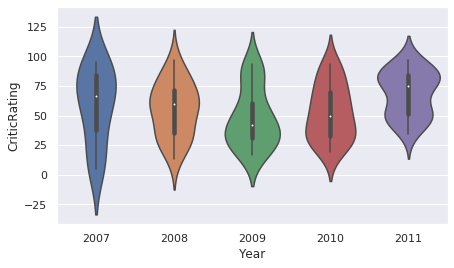

In [25]:
#z = sns.violinplot(data=movies, x='Genre', y='CriticRating')
z = sns.violinplot(data=movies[movies.Genre == 'Drama'], x='Year', y='CriticRating')

### FacedGrid to explore diffrent relations

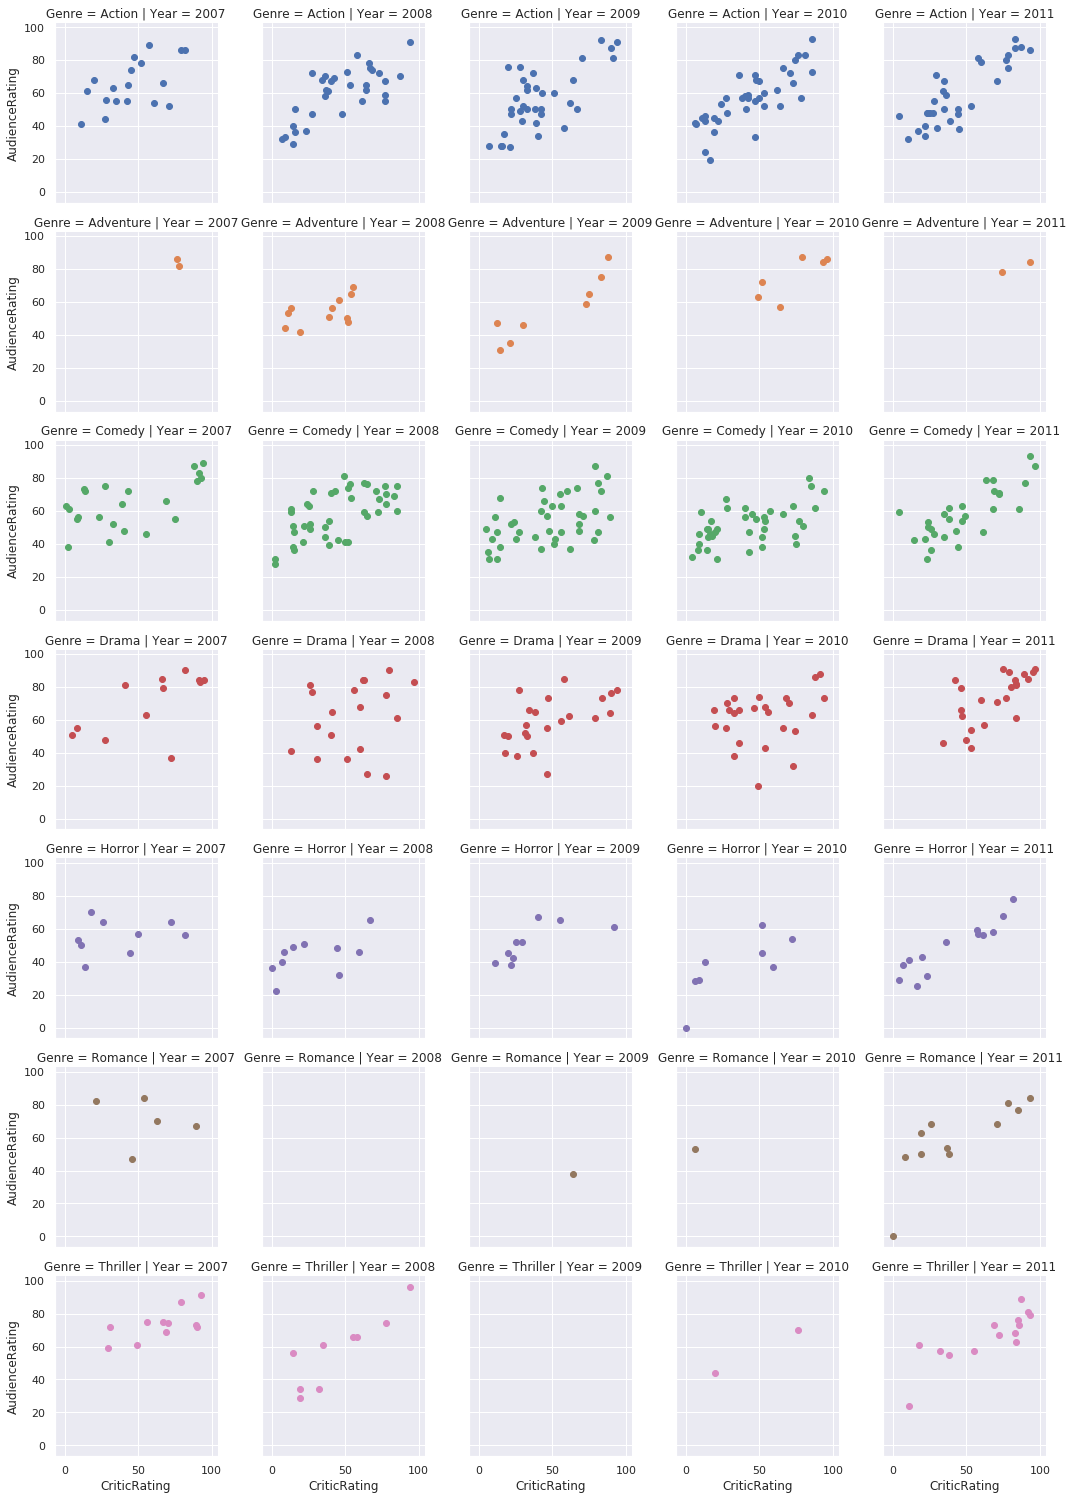

In [26]:
#FacetGrid
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating')

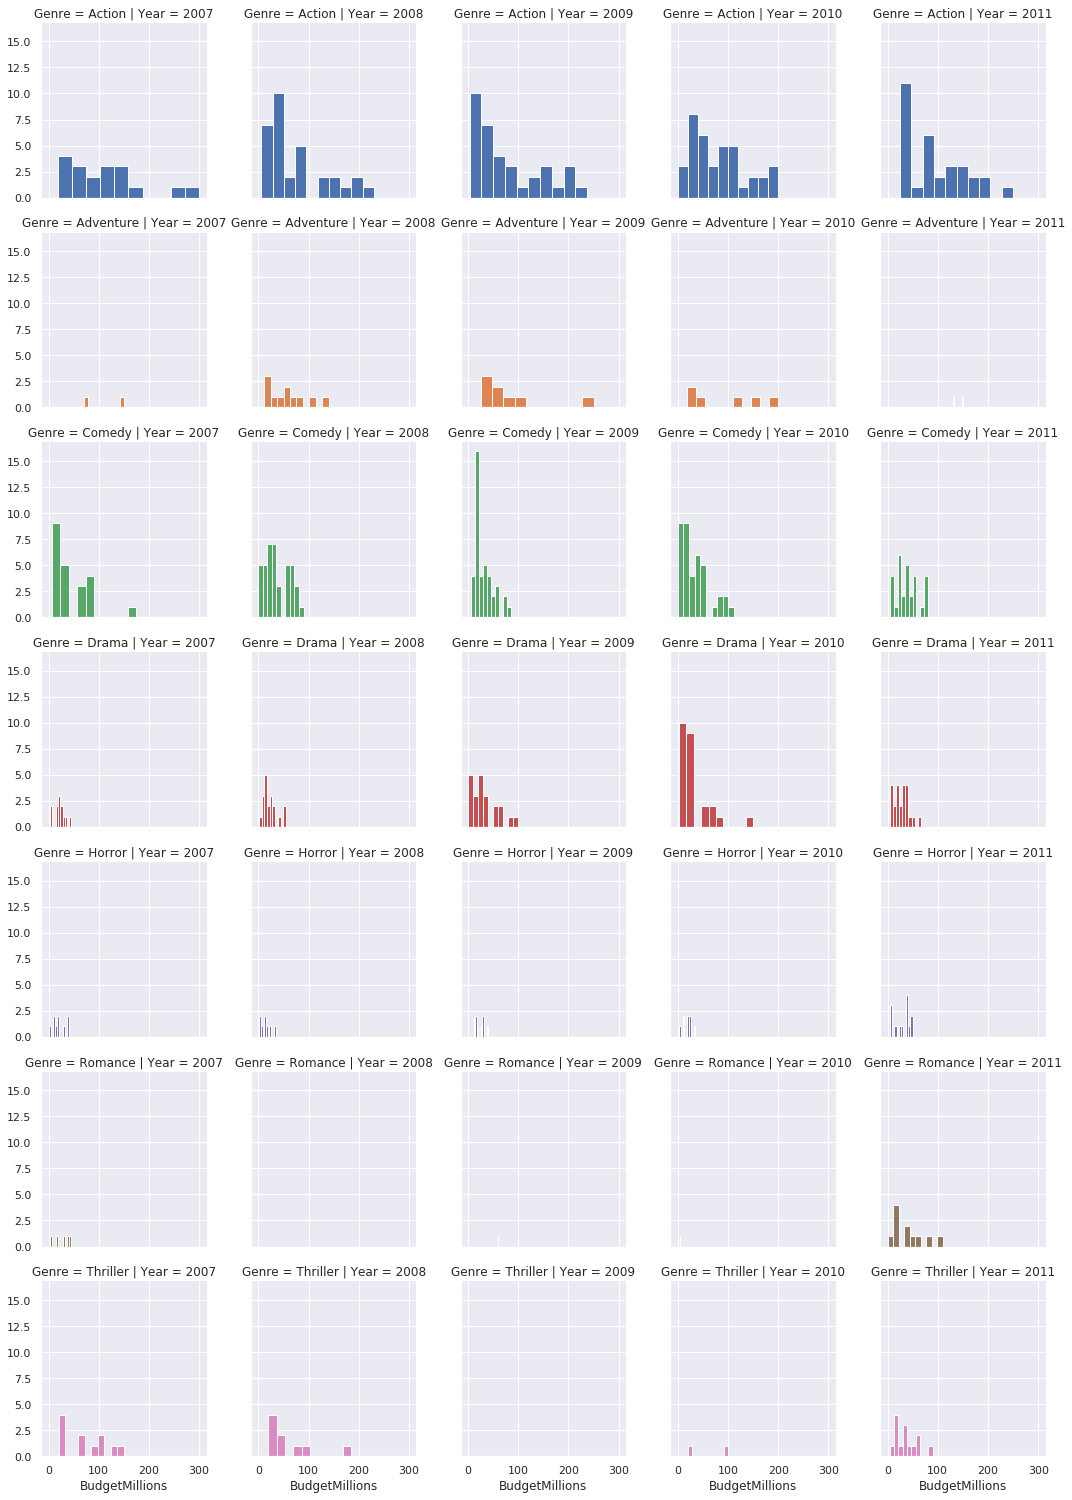

In [27]:
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
g = g.map(plt.hist, 'BudgetMillions')

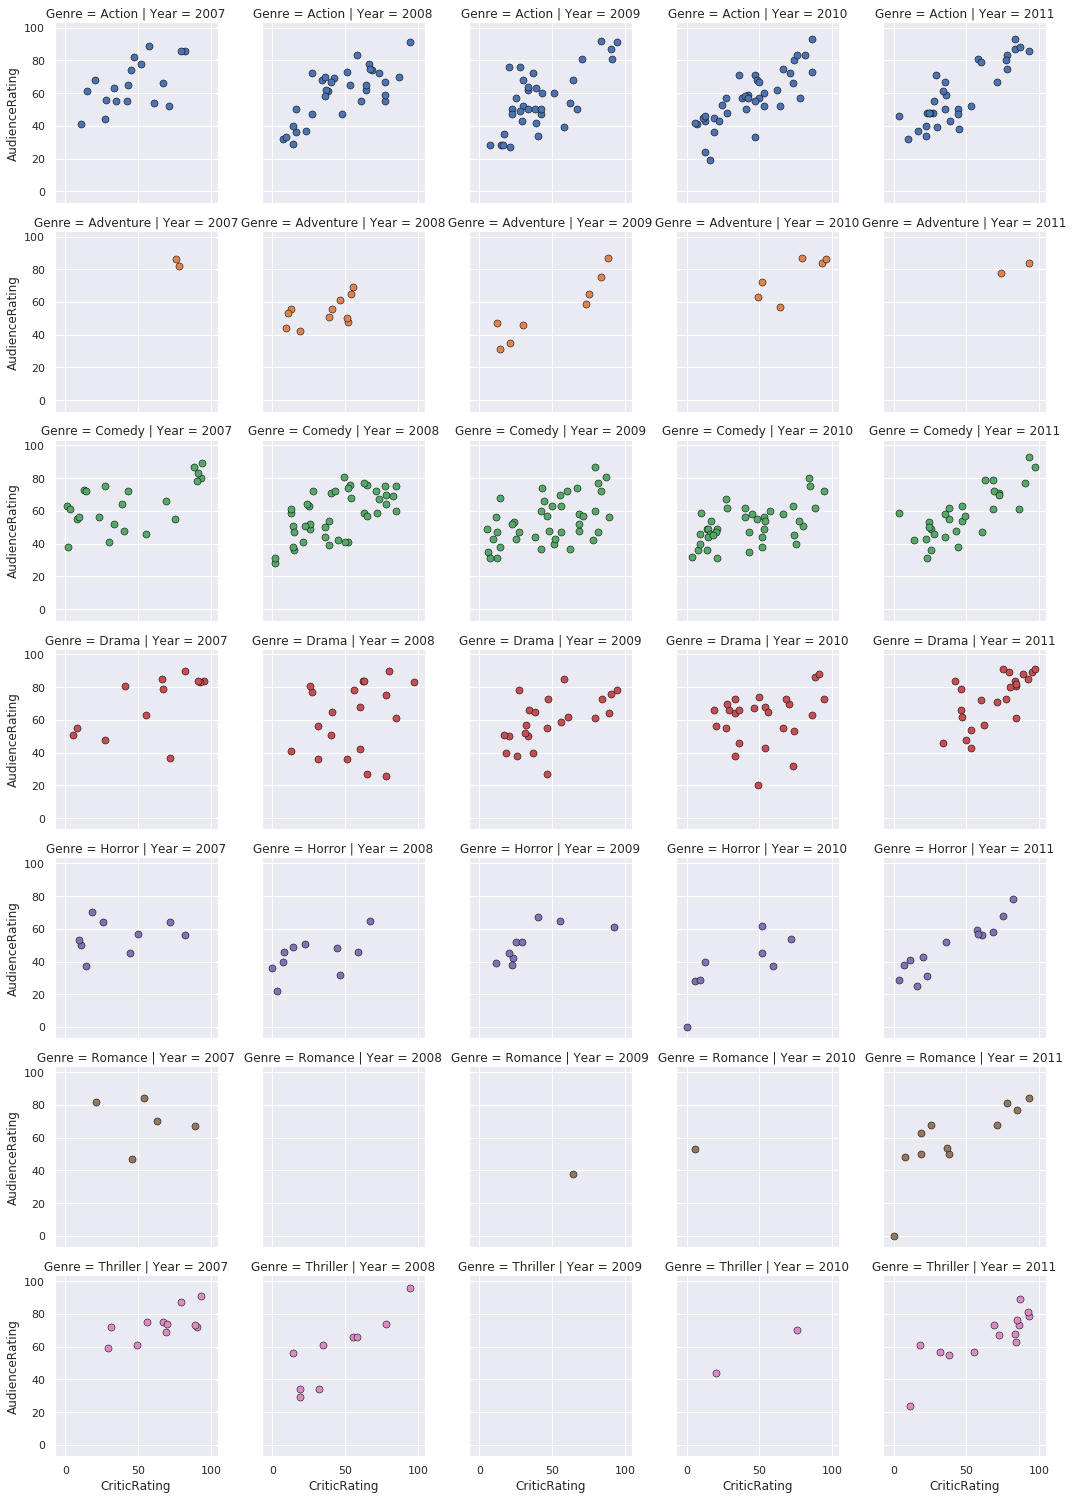

In [28]:
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)

### Controlling Axes and Adding Diagonals

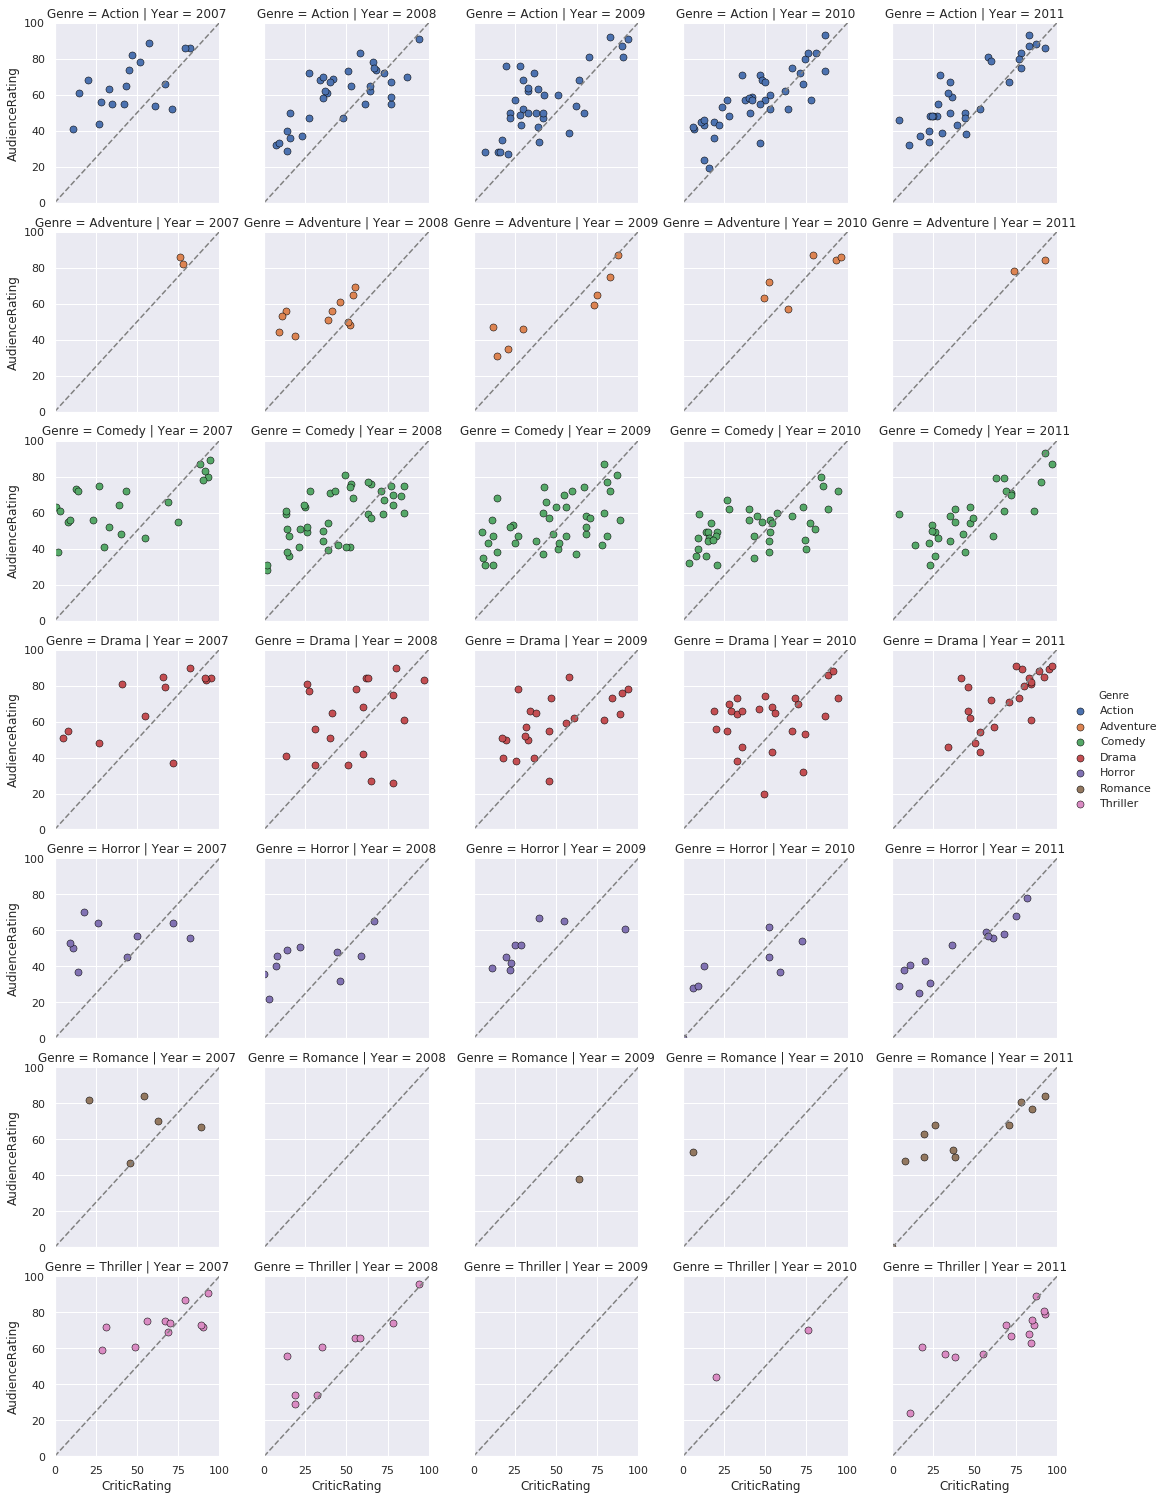

In [57]:
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)
g.set(xlim=(0,100), ylim=(0,100))
for ax in g.axes.flat:
    ax.plot((0,100), (0,100), c="gray", ls="--")
g.add_legend()
plt.show()

## Building Dashboards with subplots

#### Set of default seborn parameters

In [39]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(
    context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1,
    color_codes=True,
    rc=None,
)

#### Including pyplot object instead of sns object on ax [1,1]

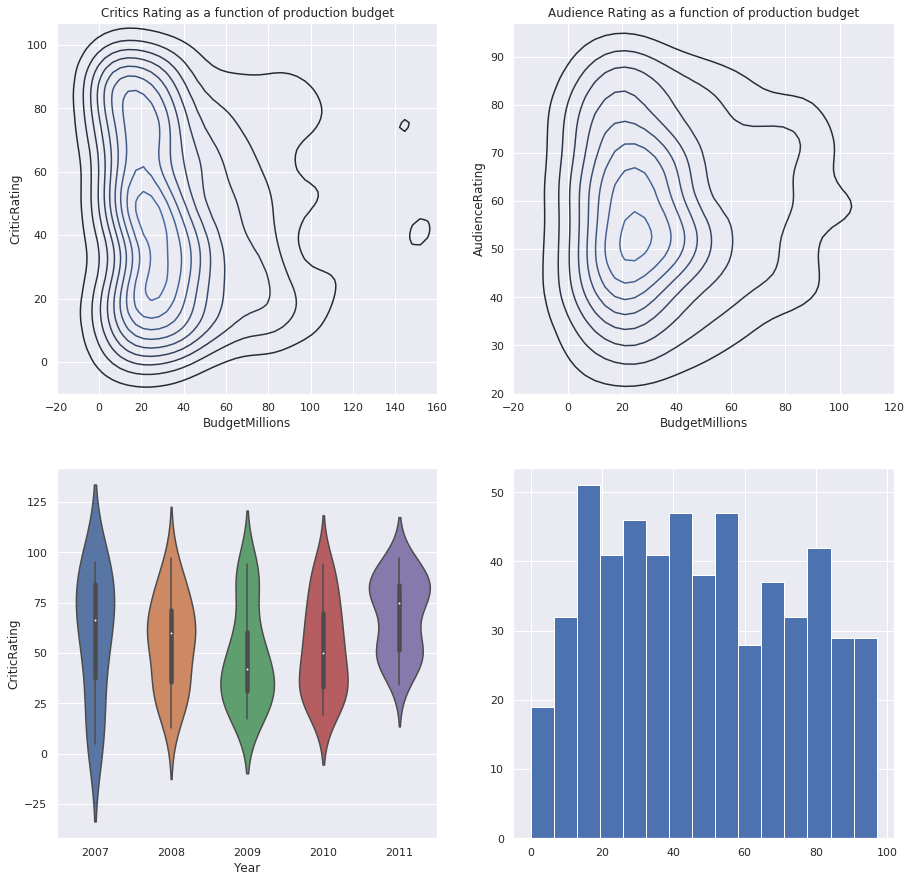

In [40]:
sns.set_style("darkgrid")
f, axes = plt.subplots(2,2, figsize=(15,15))
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0,1])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[0,0])
k1.set(xlim=(-20,120), ylim=(20,97), title='Audience Rating as a function of production budget')
k2.set(xlim=(-20,160), ylim=(-10,107), title='Critics Rating as a function of production budget')
z = sns.violinplot(data=movies[movies.Genre == 'Drama'], x='Year', y='CriticRating', ax=axes[1,0])
axes[1,1].hist(movies.CriticRating, bins=15) # plt object implementation

#kd1 = sns.kdeplot(movies.CriticRating,
#                 movies.AudienceRating,
#                 shade=True,
#                 shade_lowest=False,
#                 cmap='Reds',
#                 ax=axes[1,1])
#kd1b = sns.kdeplot(movies.CriticRating,
#                  movies.AudienceRating,
#                  cmap='Reds',
#                  ax=axes[1,1])
plt.show()

### Creating a dashboard with subplots

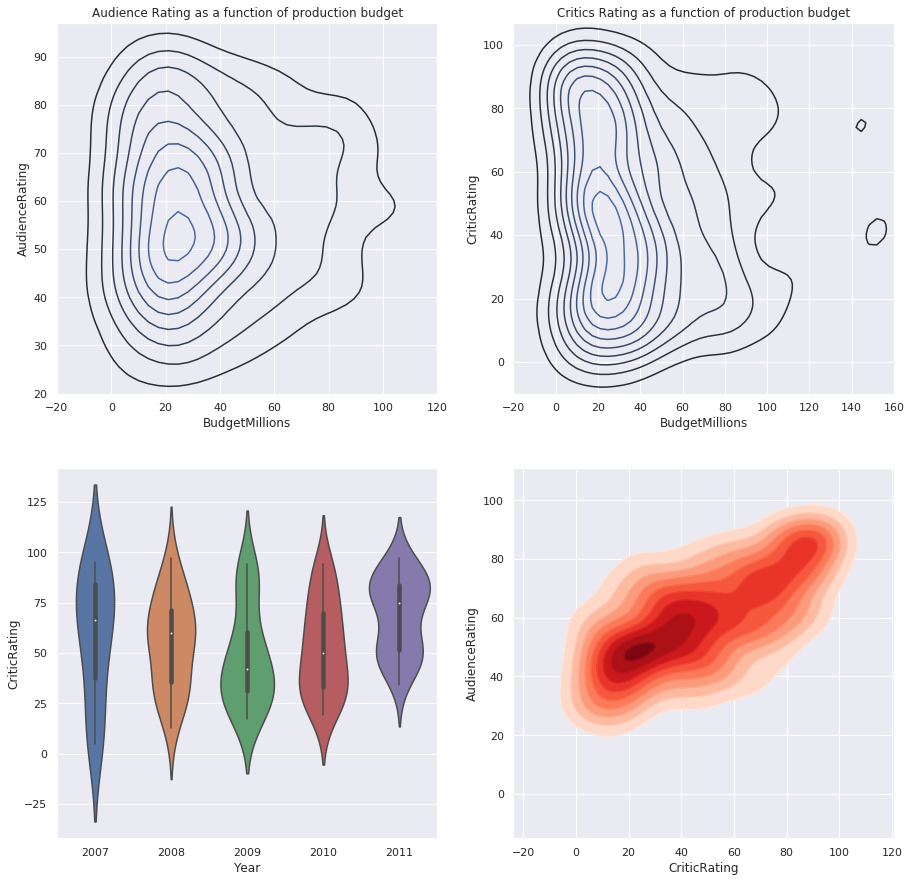

In [33]:
sns.set_style("darkgrid")
f, axes = plt.subplots(2,2, figsize=(15,15))
#Plot [0,0]
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0,0])
#Plot [0,1]
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[0,1])
#Plot [1,0]
z = sns.violinplot(data=movies[movies.Genre == 'Drama'], x='Year', y='CriticRating', ax=axes[1,0])
#Plot [1,1]
kd1 = sns.kdeplot(movies.CriticRating,
                 movies.AudienceRating,
                 shade=True,
                 shade_lowest=False,
                 cmap='Reds',
                 ax=axes[1,1])
kd1b = sns.kdeplot(movies.CriticRating,
                  movies.AudienceRating,
                  cmap='Reds',
                  ax=axes[1,1])

k1.set(xlim=(-20,120), ylim=(20,97), title='Audience Rating as a function of production budget')
k2.set(xlim=(-20,160), ylim=(-10,107), title='Critics Rating as a function of production budget')
plt.show()

### Styling the plots

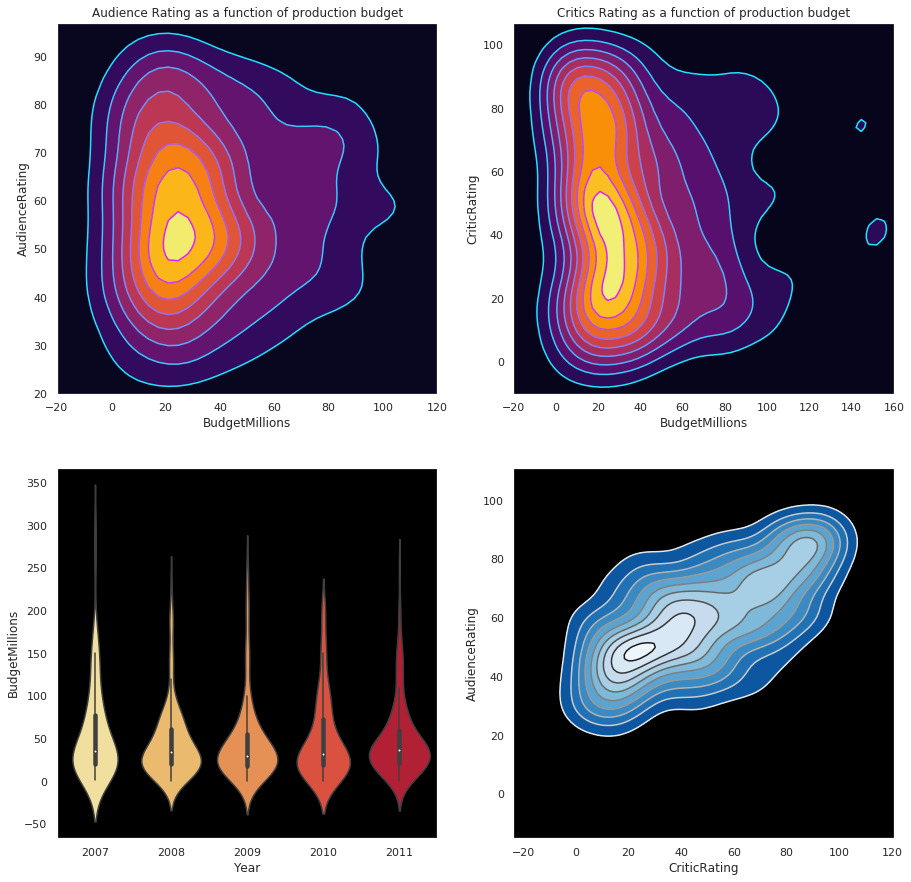

In [73]:
sns.set(style="dark", rc={"axes.facecolor": "black"})
fig, axes = plt.subplots(2,2, figsize=(15,15))

#Plot [0,0]
k1a = sns.kdeplot(movies.BudgetMillions,
                  movies.AudienceRating,
                  shade=True,
                  shade_lowest=True,
                  cmap='inferno',
                  ax=axes[0,0])
k1b = sns.kdeplot(movies.BudgetMillions,
                  movies.AudienceRating,
                  cmap='cool',
                  ax=axes[0,0])

#Plot [0,1]
k2a = sns.kdeplot(movies.BudgetMillions,
                  movies.CriticRating,
                  shade=True,
                  shade_lowest=True,
                  cmap='inferno',
                  ax=axes[0,1])
k2b = sns.kdeplot(movies.BudgetMillions,
                  movies.CriticRating,
                  cmap='cool',
                  ax=axes[0,1])

#Plot [1,0]
z = sns.violinplot(data=movies,
                   x='Year',
                   y='BudgetMillions',
                   palette='YlOrRd',
                   ax=axes[1,0])

#Plot [1,1]
k3a = sns.kdeplot(movies.CriticRating,
                  movies.AudienceRating,
                  shade=True,
                  shade_lowest=False,
                  cmap='Blues_r',
                  ax=axes[1,1])
k3b = sns.kdeplot(movies.CriticRating,
                  movies.AudienceRating,
                  cmap='gist_gray_r',
                  ax=axes[1,1])

k1a.set(xlim=(-20,120), ylim=(20,97), title='Audience Rating as a function of production budget')
k2a.set(xlim=(-20,160), ylim=(-10,107), title='Critics Rating as a function of production budget')
plt.show()
fig.savefig("dashboard.png", format='png', dpi=150)

### Styling the stacked histogram plot

In [36]:
genres = list(movies.Genre.cat.categories)
stackedlist = []
for genre in genres:
       stackedlist.append(movies[movies.Genre == genre].BudgetMillions)

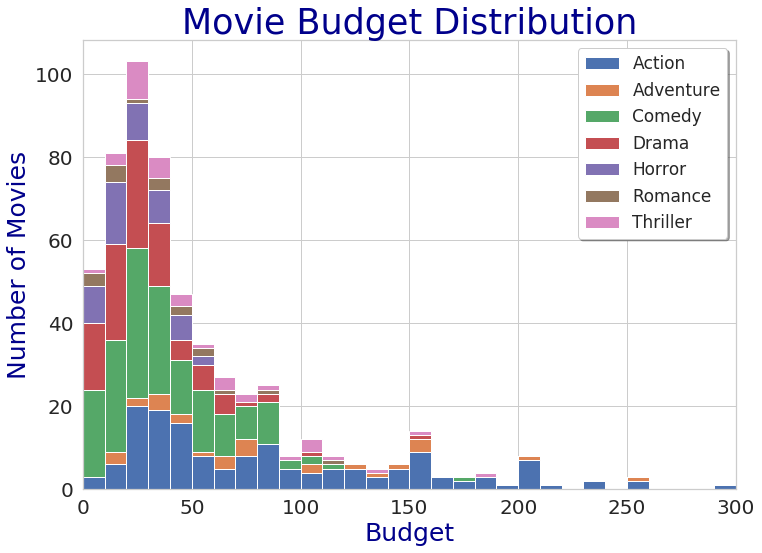

In [74]:
sns.set(style="whitegrid")

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27) #size of A4-paper
h = plt.hist(stackedlist, bins=30, stacked=True, label=genres)
plt.title("Movie Budget Distribution",
          fontsize=35,
          color='DarkBlue',
          fontname='Console')
plt.xlim(0,300)
plt.legend(fontsize=17, shadow=True)
plt.ylabel('Number of Movies', fontsize=25, color='DarkBlue')
plt.xlabel('Budget', fontsize=25, color='DarkBlue')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.show()
fig.savefig("moviebudget.png", format='png', dpi=150)

### Colormaps List

Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

In [60]:
colormaps = ["Accent", "Accent_r", "Blues", "Blues_r", "BrBG", "BrBG_r", "BuGn", "BuGn_r", "BuPu", "BuPu_r", "CMRmap", "CMRmap_r", \
             "Dark2", "Dark2_r", "GnBu", "GnBu_r", "Greens", "Greens_r", "Greys", "Greys_r", "OrRd", "OrRd_r", "Oranges", "Oranges_r", \
             "PRGn", "PRGn_r", "Paired", "Paired_r", "Pastel1", "Pastel1_r", "Pastel2", "Pastel2_r", "PiYG", "PiYG_r", "PuBu", "PuBuGn", \
             "PuBuGn_r", "PuBu_r", "PuOr", "PuOr_r", "PuRd", "PuRd_r", "Purples", "Purples_r", "RdBu", "RdBu_r", "RdGy", "RdGy_r", \
             "RdPu", "RdPu_r", "RdYlBu", "RdYlBu_r", "RdYlGn", "RdYlGn_r", "Reds", "Reds_r", "Set1", "Set1_r", "Set2", "Set2_r", "Set3", "Set3_r", \
             "Spectral", "Spectral_r", "Wistia", "Wistia_r", "YlGn", "YlGnBu", "YlGnBu_r", "YlGn_r", "YlOrBr", "YlOrBr_r", "YlOrRd", "YlOrRd_r", \
             "afmhot", "afmhot_r", "autumn", "autumn_r", "binary", "binary_r", "bone", "bone_r", "brg", "brg_r", "bwr", "bwr_r", "cividis", "cividis_r", \
             "cool", "cool_r", "coolwarm", "coolwarm_r", "copper", "copper_r", "cubehelix", "cubehelix_r", "flag", "flag_r", "gist_earth", "gist_earth_r", \
             "gist_gray", "gist_gray_r", "gist_heat", "gist_heat_r", "gist_ncar", "gist_ncar_r", "gist_rainbow", "gist_rainbow_r", "gist_stern", "gist_stern_r", \
             "gist_yarg", "gist_yarg_r", "gnuplot", "gnuplot2", "gnuplot2_r", "gnuplot_r", "gray", "gray_r", "hot", "hot_r", "hsv", "hsv_r", \
             "icefire", "icefire_r", "inferno", "inferno_r", "jet", "jet_r", "magma", "magma_r", "mako", "mako_r", "nipy_spectral", "nipy_spectral_r", \
             "ocean", "ocean_r", "pink", "pink_r", "plasma", "plasma_r", "prism", "prism_r", "rainbow", "rainbow_r", "rocket", "rocket_r", "seismic", "seismic_r", \
             "spring", "spring_r", "summer", "summer_r", "tab10", "tab10_r", "tab20", "tab20_r", "tab20b", "tab20b_r", "tab20c", "tab20c_r", "terrain", "terrain_r", \
             "twilight", "twilight_r", "twilight_shifted", "twilight_shifted_r", "viridis", "viridis_r", "vlag", "vlag_r", "winter", "winter_r"]